In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

%config InlineBackend.figure_format = "retina"
plt.style.use(["seaborn-colorblind", "seaborn-darkgrid"])

from utils import HPDI, PI

#### Code 3.1

In [2]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

#### Code 3.2

In [3]:
def posterior_grid_approx(grid_points=20, success=6, tosses=9):
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior

p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)

#### Code 3.3

In [4]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

#### Code 3.4

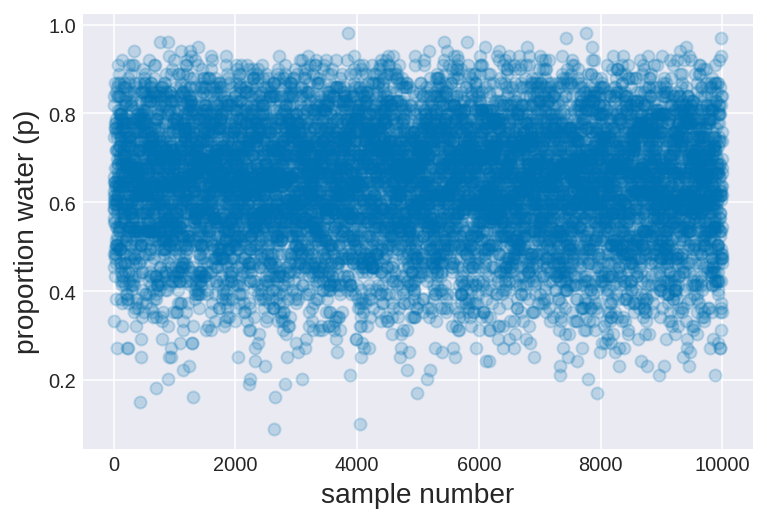

In [5]:
plt.plot(samples, "o", alpha=0.2)
plt.xlabel("sample number", fontsize=14)
plt.ylabel("proportion water (p)", fontsize=14);

#### Code 3.5

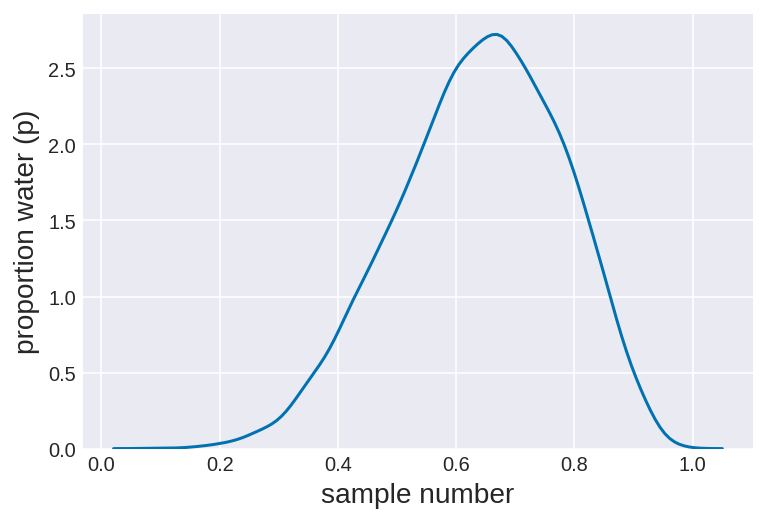

In [6]:
sns.kdeplot(samples)
plt.xlabel("sample number", fontsize=14)
plt.ylabel("proportion water (p)", fontsize=14);

#### Code 3.6

In [7]:
# add up posterior probability where p < 0.5
sum(posterior[p_grid < 0.5])

0.17183313110747478

#### Code 3.7

In [8]:
sum(samples < 0.5) / 1e4

0.17069999999999999

#### Code 3.8

In [9]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.60219999999999996

#### Code 3.9

In [10]:
np.percentile(samples, 80)

0.76767676767676774

#### Code 3.10

In [11]:
np.percentile(samples, [10, 90])

array([ 0.44444444,  0.81818182])

#### Code 3.11

In [12]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

#### Code 3.12

In [13]:
PI(samples, prob=0.5)

array([ 0.70870871,  0.93293293])

#### Code 3.13

In [14]:
HPDI(samples, prob=0.5)

(0.84184184184184185, 0.99899899899899902)

#### Code 3.14

In [15]:
p_grid[posterior.argmax()]

1.0

#### Code 3.15

In [16]:
stats.mode(samples)[0]

array([ 0.99099099])

#### Code 3.16

In [17]:
np.mean(samples), np.median(samples)

(0.80181821821821819, 0.84334334334334327)

#### Code 3.17

In [18]:
sum(posterior * abs(0.5 - p_grid))

0.31287518749981219

#### Code 3.18

In [19]:
loss = np.array(list(map(lambda d: sum(posterior * abs(d - p_grid)), p_grid)))

#### Code 3.19

In [20]:
p_grid[loss.argmin()]

0.84084084084084088

#### Code 3.20

In [21]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([ 0.09,  0.42,  0.49])

#### Code 3.21

In [22]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([2])

#### Code 3.22

In [23]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([1, 1, 2, 1, 2, 2, 1, 1, 1, 2])

#### Code 3.23

In [24]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
np.array([(dummy_w == i).sum() for i in range(3)]) / 1e5

array([ 0.08908,  0.42123,  0.48969])

#### Code 3.24

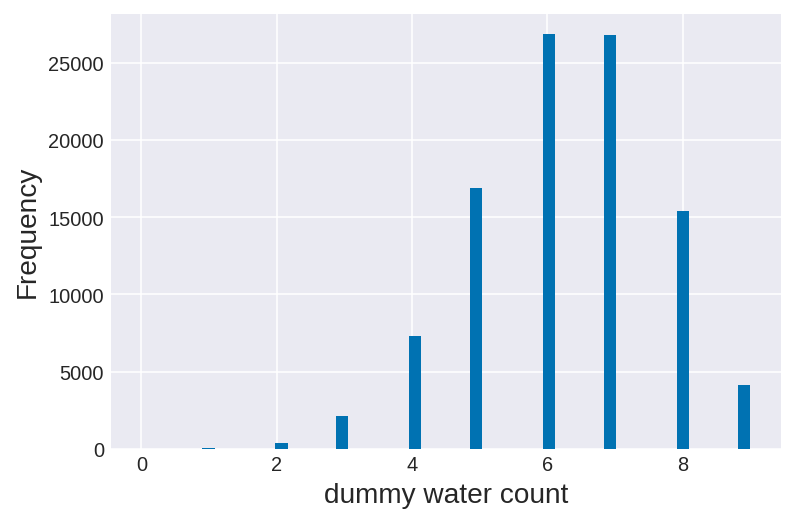

In [25]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
plt.hist(dummy_w, bins=50)
plt.xlabel("dummy water count", fontsize=14)
plt.ylabel("Frequency", fontsize=14);

#### Code 3.25

In [26]:
w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))

#### Code 3.26

In [27]:
w = stats.binom.rvs(n=9, p=samples, size=int(1e4))

#### Code 3.27

In [28]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

#### Code 3.28

In [29]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,
                   0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,
                   1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,
                   0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

#### Code 3.29

In [30]:
#

#### Code 3.30

In [31]:
sum(birth1) + sum(birth2)

111

In [32]:
import platform, sys, IPython, scipy, matplotlib
print("This notebook was createad on a computer {} running {} and using:\n"
      "Python {}\nIPython {}\nNumPy {}\nSciPy {}\nMatplotlib {}\nSeaborn {}".format(
          platform.machine(), " ".join(platform.linux_distribution()[:2]), sys.version[:5],
          IPython.__version__, np.__version__, scipy.__version__, matplotlib.__version__,
          sns.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.5.4
IPython 6.1.0
NumPy 1.13.1
SciPy 0.19.1
Matplotlib 2.0.2
Seaborn 0.8.0
